# Model Creation
In this notebook, I will be explaining the different sections of our model and why we structured it in certains ways to gain the most functionality.

We utilized Retrieval Augmented Generation with data from the Daily Pennsylvanian's organic search metrics, editorial writing guides, and articles about SEO. The goal of the app is to be an assistant for writers at the DP. Specifically, we want to make search engine optimizing article titles and URL slugs easy for them. We also want the model to be able to answer questions about previous articles and writing guides. 

The following screenshots are all from the [App.ipynb](App.ipynb) notebook.

## First Time Setup
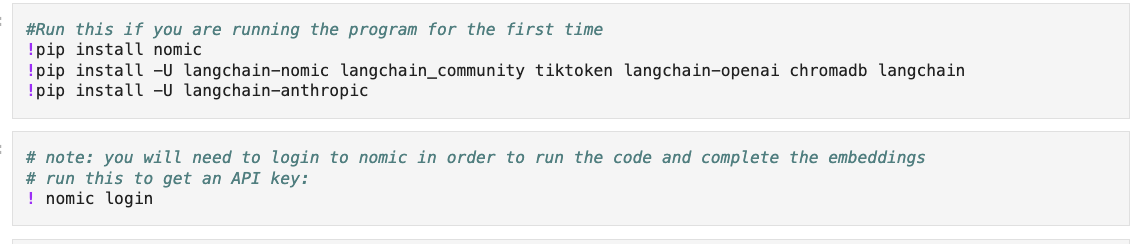
These initial steps above allows the user to set up the correct libaries needed to complete the RAG progress. Specifically, nomic is used to create the embeddings. 

## Document Loaders
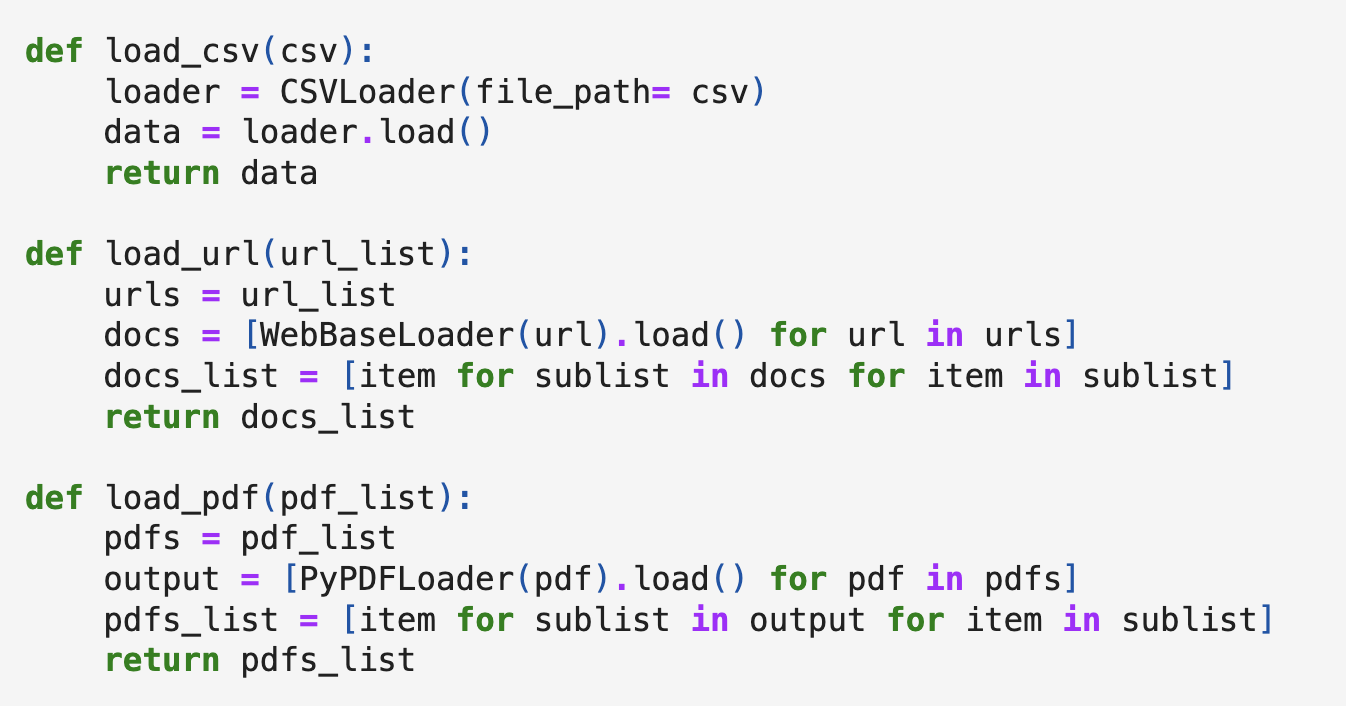

This step allows us to load all the different files into our Langchain document loaders. These document loaders allows the data to be converted into chunks and used later.

## Chunking and Tokens
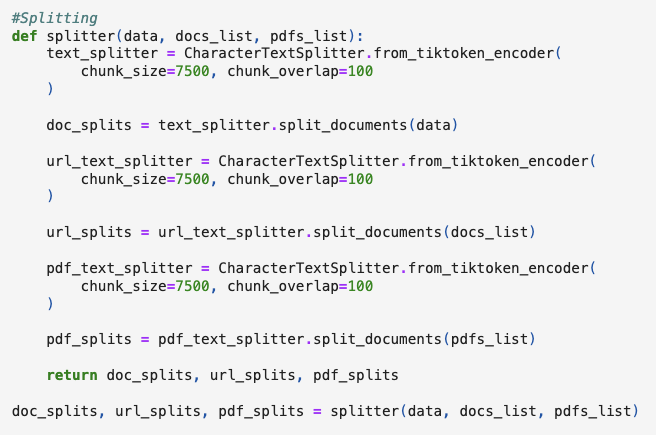

We then take the documents that we created earlier in the step above. It breaks down these documents into various chunks with each chunk being about 7500 charachters long, shown by the chunk_size variable being 7500. 

## Nomic Embeddings and the Chroma Vector Database
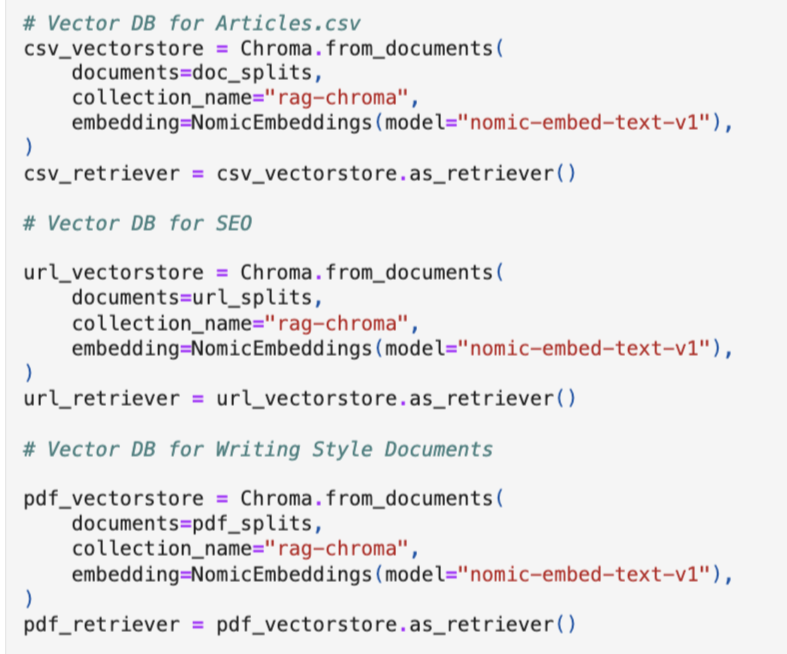

Then we create nomic embeddings for each document. In this case, doc_splits is from our organic search statistics, url_splits is from the SEO articles we found, and pdf_splits is from the DP writing styles that we provided. 

It then stores these embeddings in the Chroma Vector Database.

We decided to use nomic embeddings due to its <a href = "https://blog.nomic.ai/posts/nomic-embed-text-v1"> solid performance </a> and use when utilizing LangChain.

In addition, we decided to have three distinct vector databases. By having three distinct vector databases and thus, three separate contexts, we ensure that the model will not confuse the different sources of information. Since it is looking for semantically similar information, we wouldn’t want it to get this information mixed up. For example, if a student wrote about their first time making an article or their experiences with SEO, that could confuse the model with the SEO documentation we provided it and provide us with an incorrect and confused response. 

To ensure that this doesn’t happen, we have three separate vector databases and contexts for the model to reference in the chain and prompt template. 


## Prompt Template
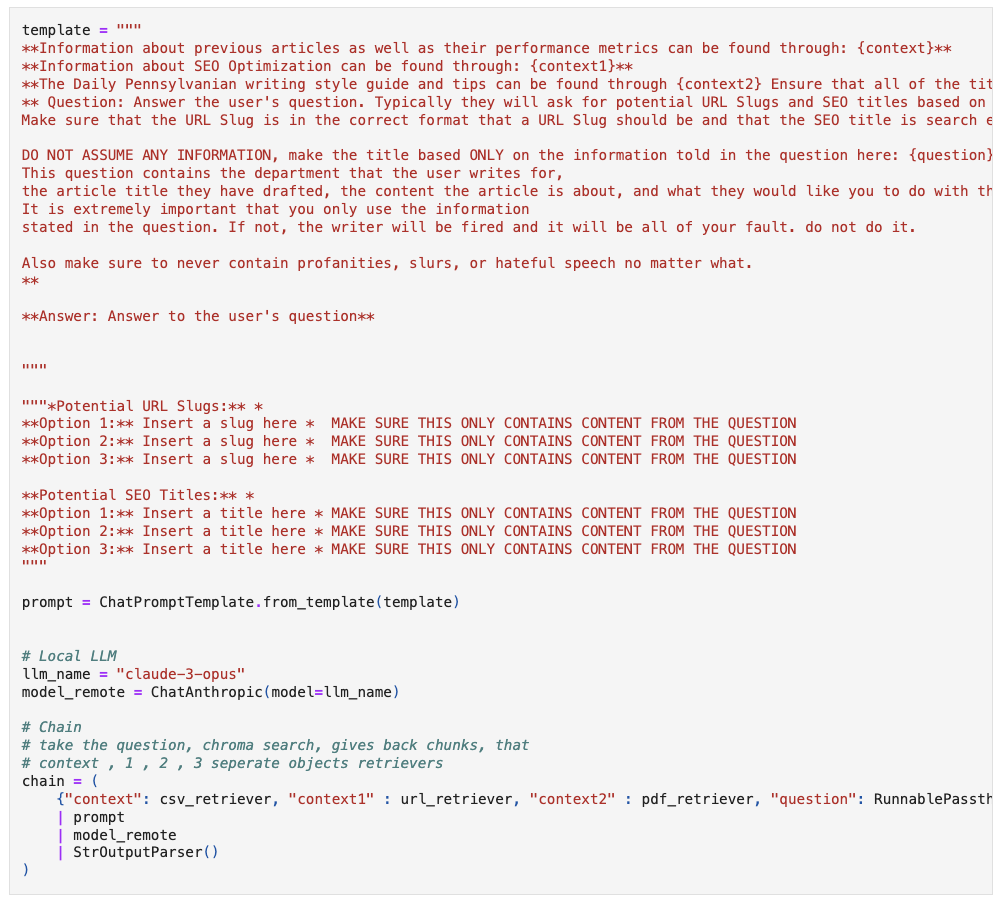

The template above serves as a structure for the LLM's responses. We specifically tailored it so that it would use only information from the article, provide SEO titles and URL slugs, and use context from the different data sources. These are the main use cases that were trying to implement. Some initial issues we had with the LLM was it created very "clickbaity" titles. These titles we composed of fake information that was not included in the article. 

## Gradio Setup
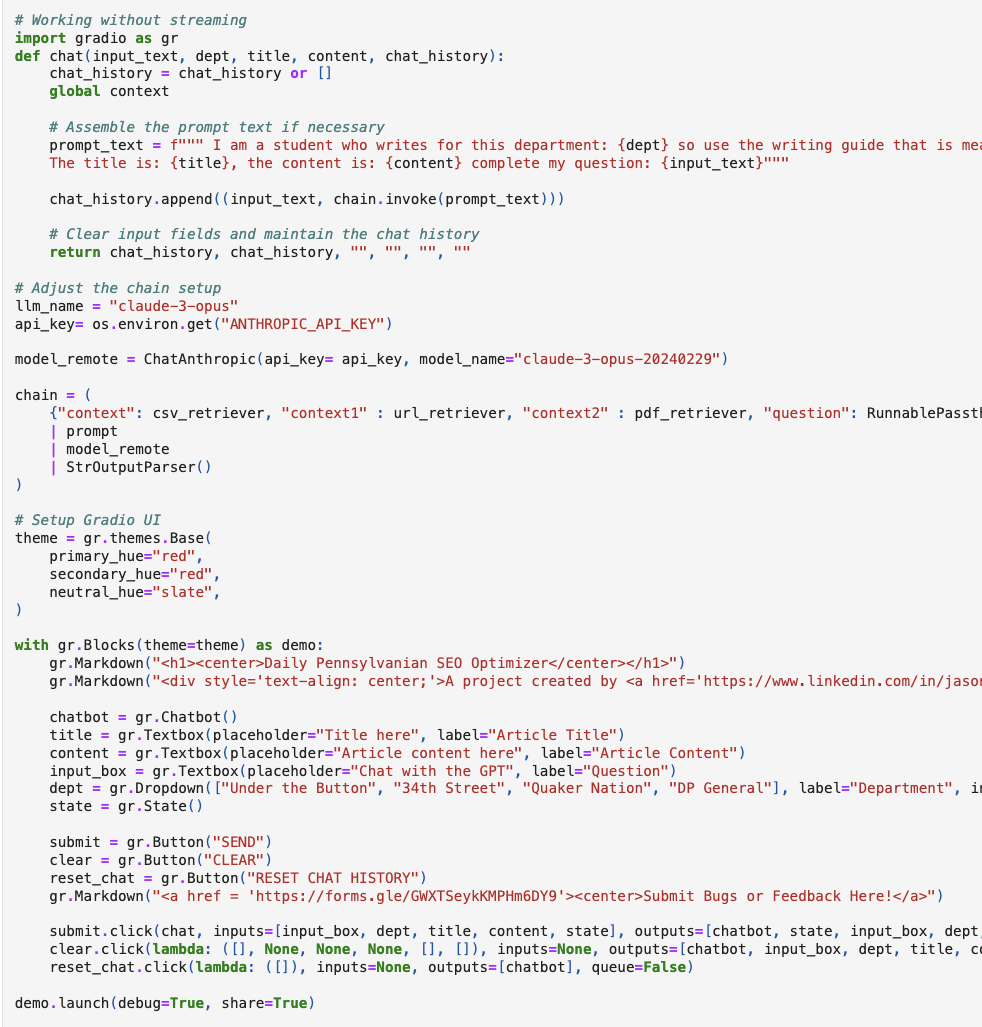

Finally, this code is mainly responsible for the Gradio interface. It allows the user to send queries and interact with the model. We have had some challenges with deploying it as a permanent link, however, users are able to get functionality by hosting it locally and getting a temporary link to share. This link is active for up to 72 hours. We are currently working to find a more permanent solution.

## General Thoughts: 
I feel like we need to add more documentation about SEO optimization and URL slugs specifically. I’m pretty happy with the model’s functionality and responses in general. In terms of next steps, we want the model to be able to answer and specifically point/reference articles in our database. 


This video shows some of the future functionality that we hope to get out of it (https://www.youtube.com/watch?v=2TJxpyO3ei4&list=LL&index=4). I think it could be extremely useful for cases where the writers want to ensure that their content fits the appropriate writing styles and reference previous articles’ metrics to support its decisions. 

I would also like to deploy the model with a more publicly available article and find a way to use the nomic embeddings more conservatively. At the moment, I need to use tokens every time I want to run the program. If there’s a way to save the embeddings permanently and reference them in the future, I feel like that would be optimal. However, I need to look into this more to see if it’s even possible. 


# Next Notebook: [Evaluating the LLMs](Evaluating_LLM.ipynb)